# Czy programy socjalne mają wpływ na przyrost naturalny

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data_path_ludnosc = "../ludnosc.csv"
data_path_gminy = "../gminy.csv"
df_ludnosc = pd.read_csv(data_path_ludnosc, sep=";", decimal=',')
df_gminy = pd.read_csv(data_path_gminy, sep=";", decimal=',')

/Users/kozlovvski/.pyenv/versions/3.9.7/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Wartość świadczeń społecznych na przestrzeni lat
### 1. Wykres wartości świadczeń społecznych dla całego kraju na przestrzeni lat

/var/folders/y9/90zjy_y55tqfr19vhn6rcqrw0000gp/T/ipykernel_20294/140193045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_social['świadczenia'] = df_social['Wartosc']


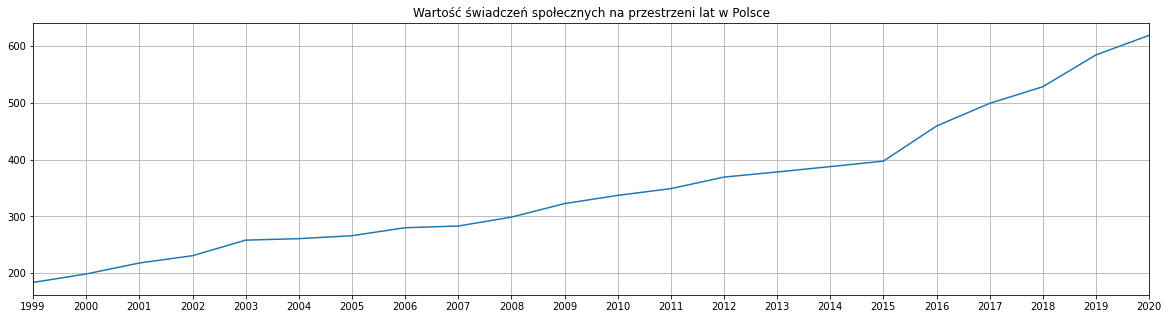

In [2]:
df_social = df_ludnosc[(df_ludnosc.Zmienna == "ze świadczeń społecznych") & (df_ludnosc.Nazwa == "POLSKA")]
df_social['świadczenia'] = df_social['Wartosc']
df_social = df_social[['Rok', 'świadczenia']]

plt.figure(figsize=(20,5))
plt.xticks(df_social['Rok'])
plt.xlim(1999,2020)
plt.grid(True)
plt.title('Wartość świadczeń społecznych na przestrzeni lat w Polsce')
plt.plot(df_social['Rok'], df_social['świadczenia'])

## Przyrost naturalny na przestrzeni lat
### 1. Wykres przyrostu naturalnego dla całego kraju na przestrzeni lat

/var/folders/y9/90zjy_y55tqfr19vhn6rcqrw0000gp/T/ipykernel_20294/2172912404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_przyrost['przyrost'] = df_przyrost['Wartosc']


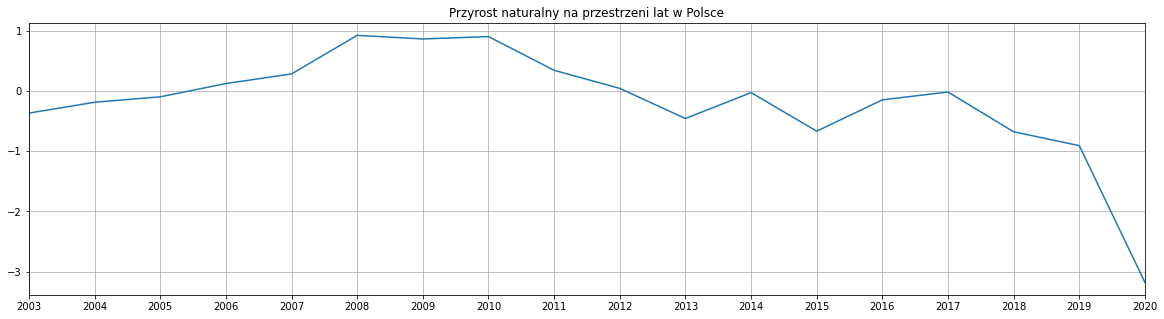

In [3]:
df_przyrost = df_gminy[(df_gminy.Zmienna == "przyrost naturalny na 1000 ludności") & (df_gminy.Nazwa == "POLSKA")]
df_przyrost['przyrost'] = df_przyrost['Wartosc']
df_przyrost = df_przyrost[['Rok', 'przyrost']]

plt.figure(figsize=(20,5))
plt.xticks(df_social['Rok'])
plt.xlim(2003,2020)
plt.grid(True)
plt.title('Przyrost naturalny na przestrzeni lat w Polsce')
plt.plot(df_przyrost['Rok'], df_przyrost['przyrost'])

## Przyrost naturalny w zależności od wysokości świadczeń społecznych
### 1. Wykres przyrostu naturalnego w zależności od wysokości świadczeń społecznych dla całego kraju

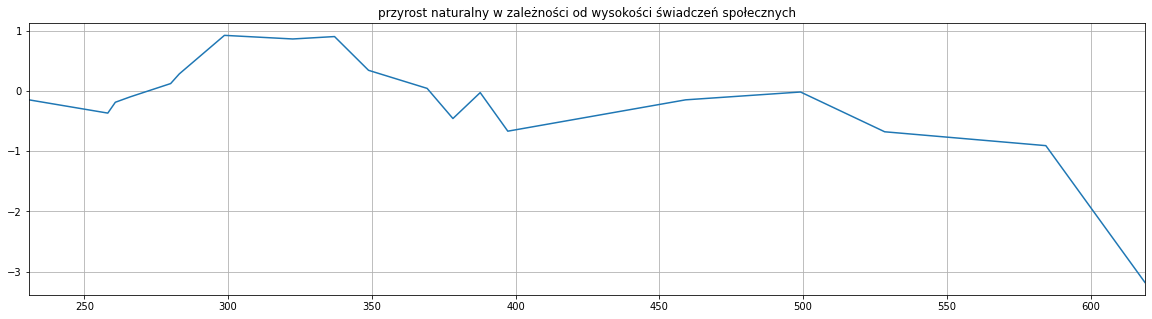

In [4]:
df_merged = pd.merge_asof(df_social, df_przyrost, 'Rok').dropna()
df_merged.set_index('Rok', inplace=True)

plt.figure(figsize=(20,5))
plt.grid(True)
plt.xlim(df_merged['świadczenia'].min(),df_merged['świadczenia'].max())
plt.title('przyrost naturalny w zależności od wysokości świadczeń społecznych')
plt.plot(df_merged['świadczenia'], df_merged['przyrost'])

### 2. Korelacja Pearsona pomiędzy przyrostem naturalnym a wysokością świadczeń społecznych
Jak można zauważyć korelacja jest silna oraz ujemna, co wskazuje na to, że:
- przyrost naturalny nie zależy (bądź w znikomym stopniu zależy) od wysokości świadczeń społecznych. Teoretycznie korelacja pomiędzy tymi zmiennymi powinna być dodatnia.
- istnieją inne zmienne, które są dużo bardziej istotne i powodują, że zaobserwowana korelacja jest ujemna. Przykładowo, w 2020 roku drastyczny spadek przyrostu naturalnego może być prawdopodobnie spowodowany pandemią COVID-19

In [5]:
from scipy import stats

korelacja = stats.pearsonr(df_merged['świadczenia'], df_merged['przyrost'])[0]
korelacja

-0.653652078851523